- Unsupervised Machine Learing

비지도학습으로, 차원축소와 같은 것들을 수행가능 --> 대표적으로 PCA가 있다




- Cross Validation(교차검증)

1)Holdout Cross Validation
![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb0zJMh%2FbtqEmKZ0EVm%2FqZoERRPcsFygw5kx9UsTek%2Fimg.png)



2) K-Fold Validation

데이터를 K개로 나눠서, K번의 반복을 통해서 나온 결과값을 평균내어 검증 결과값으로 사용한다. 가장 효과적인 parmeter를 찾는 등, 모델튜닝을 위해서 사용된다.

![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdPJrQJ%2FbtqEni9OmAX%2Fz5OXiHhZAAMzrIvWEEOuJK%2Fimg.png)

# 1.1.3 Decision Tree

In [1]:
from sklearn import tree

X = [[0,0], [1,1]]
Y = [0,1]

clf = tree.DecisionTreeClassifier()
clf.fit(X,Y)

DecisionTreeClassifier()

In [2]:
# 어떤 값을 예측
predict_value = clf.predict([[1,1]])

# 확률을 예측 해준다.
prob = clf.predict_proba([[0.5,0.5]])
prob

array([[1., 0.]])

[Text(558.0, 498.3, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(643.8461538461538, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(343.38461538461536, 317.1, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(171.69230769230768, 226.5, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(515.0769230769231, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(429.23076923076917, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(600.9230769230769, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(515.0769230769231, 45.

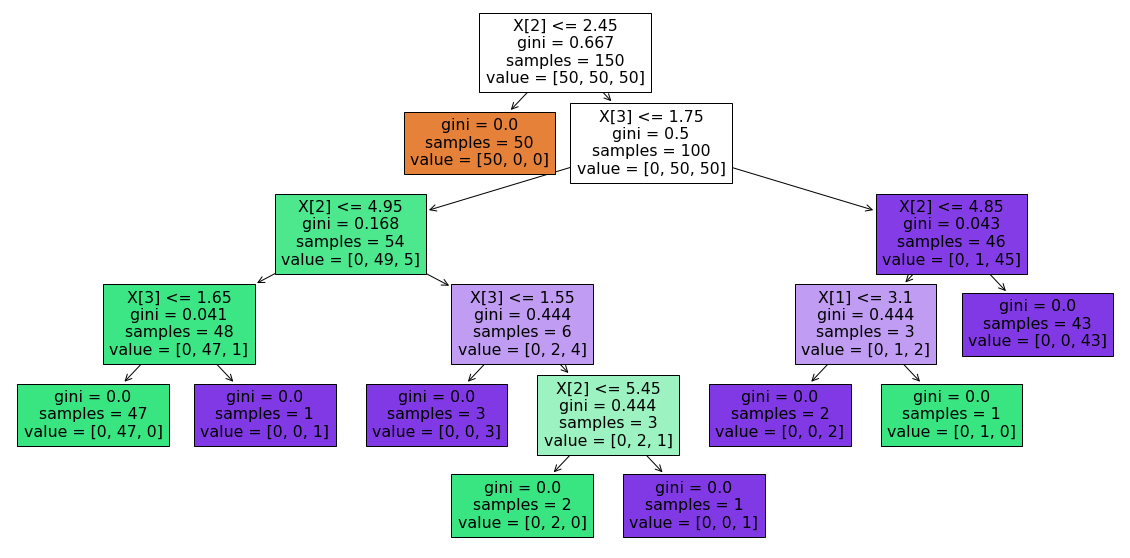

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y = True)

model = tree.DecisionTreeClassifier().fit(X,y)

plt.figure(figsize = (20,10))
tree.plot_tree(model, filled = True)


# 당뇨병 예측 모델 만들기

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns

df = pd.read_csv("diabetes.csv")

In [11]:
# train/test 데이터 나누기
X,y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state = 42)


In [13]:
# 학습 및 평가하기
model = tree.DecisionTreeClassifier().fit(X_train,y_train)
acc = model.score(X_test,y_test)
print("acc = ", acc*100)

acc =  70.12987012987013


[Text(666.8963068181819, 1050.96, 'Glucose <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(316.4289772727273, 978.48, 'Age <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(163.45454545454547, 906.0, 'Glucose <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(90.18181818181819, 833.52, 'BMI <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(78.9090909090909, 761.04, 'BMI <= 31.4\ngini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(22.545454545454547, 688.56, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(11.272727272727273, 616.08, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(33.81818181818182, 616.08, 'DiabetesPedigreeFunction <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(22.545454545454547, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(45.09090909090909, 543.6, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(135.27272727272728, 688.56, 'I

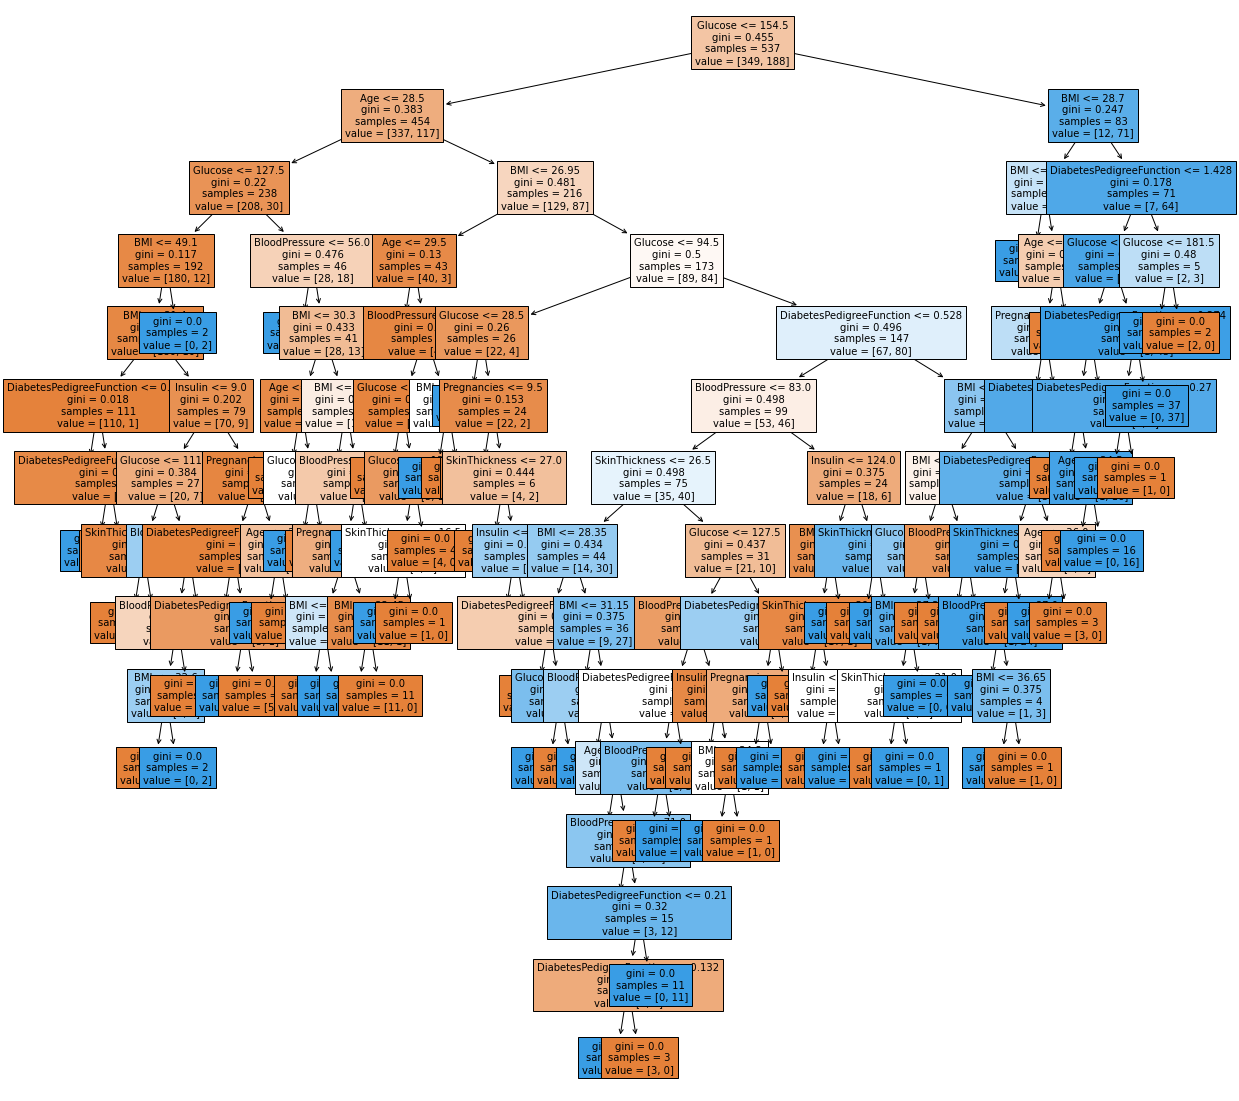

In [17]:
# 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
feature_names = df.columns[:-1].tolist()
tree.plot_tree(model, feature_names= feature_names, filled = True, fontsize= 10)


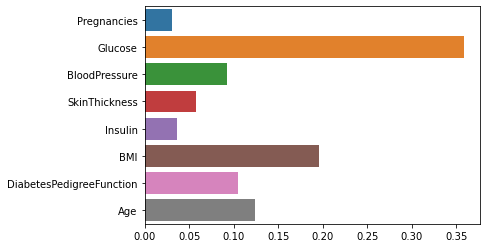

In [19]:
# featrue의 중요도를 추출해서 시각화하기
sns.barplot(x = model.feature_importances_, y = feature_names)

# 정리

1) sklearn에서 제공되는 tree를 통해 의사결정나무 알고리즘을 수행 가능하고, plot_tree를 통해서 시각화도 가능하다.

2) 학습이 완료된 model을 가지고 feature에 대한 importance를 알 수 있었는데, 이 부분이 상당히 중요한 것 같다.